# importing

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dense,Activation,Dropout
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import random
import pickle
from tensorflow.keras.callbacks import TensorBoard

In [2]:
NAME = "Cats-vs-dogs-CNN"

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

# path 

In [3]:
datapath= r'C:\\Users\\mohamed\\Desktop\\Nl\\Dataset\\PetImages'
categories=['cat','dog']

# loop over image


In [4]:

data=[]
imgsize=95
for category in categories:
    folder=os.path.join(datapath,category)
    label=categories.index(category)  #y train actual data
    print(folder)
    for img in os.listdir(folder):
        imgpath=os.path.join(folder,img)
        imgarr=cv2.imread(imgpath)   #x train
        if imgarr is None:
          continue
        else:
          imgarr=cv2.resize(imgarr,(imgsize,imgsize))
          data.append([imgarr,label])
    
    
    

C:\\Users\\mohamed\\Desktop\\Nl\\Dataset\\PetImages\cat
C:\\Users\\mohamed\\Desktop\\Nl\\Dataset\\PetImages\dog


In [5]:
len(data)

24946

In [6]:
random.shuffle(data)

In [7]:

data[1]

[array([[[  1,  14,   4],
         [  5,  10,   6],
         [ 19,  17,  16],
         ...,
         [ 26,  25,  44],
         [ 13,  16,  12],
         [ 20,  21,  17]],
 
        [[  4,  12,   3],
         [ 11,  14,  10],
         [ 17,  17,  16],
         ...,
         [162, 128, 243],
         [  9,  16,  11],
         [  9,  19,  16]],
 
        [[ 13,  18,  10],
         [  9,   9,   6],
         [ 16,  17,  16],
         ...,
         [129,  88, 249],
         [ 19,  25,  31],
         [ 19,  38,  22]],
 
        ...,
 
        [[212, 201, 204],
         [212, 201, 204],
         [191, 180, 183],
         ...,
         [217, 211, 214],
         [214, 206, 213],
         [197, 189, 196]],
 
        [[209, 198, 201],
         [202, 191, 194],
         [195, 184, 187],
         ...,
         [217, 208, 211],
         [194, 187, 190],
         [208, 201, 204]],
 
        [[194, 182, 185],
         [197, 186, 189],
         [213, 203, 206],
         ...,
         [220, 210, 213],
  

# data to feature ,label (train,test)


In [8]:
x = [] #x list for fetaure
y = []   #y list for label


for feature,label in data:
  x.append(feature)
  y.append(label)



x= np.array(x)
y= np.array(y)
  

# Load data into pickels


In [9]:
#pickle is library used to store/serializing python object into byte stream to store it on file
import pickle

pickle_out1 = open("X.pickle","wb")
pickle.dump(x, pickle_out1)
pickle_out1.close()

pickle_out2 = open("y.pickle","wb")
pickle.dump(y, pickle_out2)
pickle_out2.close()

# retrieve data from pickle

In [10]:
pickle_in1 = open("x.pickle","rb")
x = pickle.load(pickle_in1)

pickle_in2 = open("y.pickle","rb")
y = pickle.load(pickle_in2)


In [11]:
#print x the number from 0 to 255 because itr range for rgp in photo
x

array([[[[151, 140, 120],
         [152, 139, 120],
         [154, 139, 120],
         ...,
         [235, 230, 209],
         [227, 225, 204],
         [224, 226, 204]],

        [[151, 140, 120],
         [154, 141, 122],
         [155, 140, 121],
         ...,
         [235, 229, 209],
         [227, 223, 203],
         [227, 225, 205]],

        [[151, 140, 120],
         [155, 142, 122],
         [151, 136, 117],
         ...,
         [231, 223, 203],
         [226, 219, 200],
         [235, 228, 211]],

        ...,

        [[169, 175, 174],
         [171, 176, 177],
         [164, 169, 172],
         ...,
         [145, 184, 187],
         [144, 186, 196],
         [141, 179, 185]],

        [[163, 168, 167],
         [172, 176, 177],
         [166, 169, 173],
         ...,
         [145, 186, 193],
         [137, 177, 191],
         [141, 177, 186]],

        [[175, 179, 178],
         [179, 182, 183],
         [167, 169, 173],
         ...,
         [131, 171, 180],
        

In [12]:
y

array([1, 1, 0, ..., 1, 0, 0])

# Normalize/scale x to be fast in calculation

In [13]:
x=x/255  #now range is from 0 to 1

In [14]:
x

array([[[[0.59215686, 0.54901961, 0.47058824],
         [0.59607843, 0.54509804, 0.47058824],
         [0.60392157, 0.54509804, 0.47058824],
         ...,
         [0.92156863, 0.90196078, 0.81960784],
         [0.89019608, 0.88235294, 0.8       ],
         [0.87843137, 0.88627451, 0.8       ]],

        [[0.59215686, 0.54901961, 0.47058824],
         [0.60392157, 0.55294118, 0.47843137],
         [0.60784314, 0.54901961, 0.4745098 ],
         ...,
         [0.92156863, 0.89803922, 0.81960784],
         [0.89019608, 0.8745098 , 0.79607843],
         [0.89019608, 0.88235294, 0.80392157]],

        [[0.59215686, 0.54901961, 0.47058824],
         [0.60784314, 0.55686275, 0.47843137],
         [0.59215686, 0.53333333, 0.45882353],
         ...,
         [0.90588235, 0.8745098 , 0.79607843],
         [0.88627451, 0.85882353, 0.78431373],
         [0.92156863, 0.89411765, 0.82745098]],

        ...,

        [[0.6627451 , 0.68627451, 0.68235294],
         [0.67058824, 0.69019608, 0.69411765]

In [15]:
x.shape  #there is 24946 photo not corupted
         # the diemnsion of the photo 95*95
         # 3 means the rgp 

(24946, 95, 95, 3)

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8) 


In [17]:
len(x_train)

19956

In [18]:
len(x_test)

4990

# create model

In [19]:

model = Sequential()

      
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
   
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
   


model.add(Flatten())

model.add(Dense(128, input_shape = x.shape[1:], activation = 'relu')) #shapr from 1 to last to take the diemnsion and rgp
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam',
			              loss='binary_crossentropy',
			              metrics=['accuracy'])

print('===================================================================================================================================')
print('===================================================================================================================================')
print('=========================================== RUNNING MODEL =========================================================================')
print('=================================================='+ '' + '======================================================================')
print('===================================================================================================================================')
print('===================================================================================================================================')

hist=model.fit(x_train, y_train, epochs=7, batch_size = 64, validation_split=0.1,callbacks=[tensorboard]) 

=========================================== RUNNING MODEL =========================================================================
Epoch 1/7
281/281 [==============================] - 944s 3s/step - loss: 0.6586 - accuracy: 0.6053 - val_loss: 0.5923 - val_accuracy: 0.6809
Epoch 2/7
281/281 [==============================] - 863s 3s/step - loss: 0.5502 - accuracy: 0.7204 - val_loss: 0.5090 - val_accuracy: 0.7515
Epoch 3/7
281/281 [==============================] - 871s 3s/step - loss: 0.4622 - accuracy: 0.7818 - val_loss: 0.4310 - val_accuracy: 0.8006
Epoch 4/7
281/281 [==============================] - 874s 3s/step - loss: 0.4015 - accuracy: 0.8179 - val_loss: 0.3962 - val_accuracy: 0.8221
Epoch 5/7
281/281 [==============================] - 871s 3s/step - loss: 0.3489 - accuracy: 0.8472 - val_loss: 0.4190 - val_accuracy: 0.8206
Epoch 6/7
281/281 [==============================] - 871s 3s/step - loss: 0.3026 - accuracy: 0.8690 - val_loss: 0.3203 - val_accuracy: 0.8592
Epoch 7/7
281/28

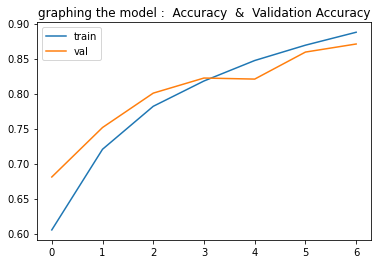

In [20]:
plt.plot(hist.history['accuracy'], label = 'train')
plt.plot(hist.history['val_accuracy'], label = 'val')
plt.title('graphing the model :  Accuracy  &  Validation Accuracy')
plt.legend()
plt.show()

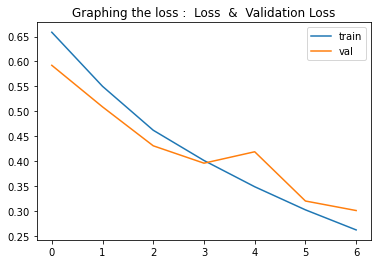

In [21]:
plt.plot(hist.history['loss'], label = 'train')
plt.plot(hist.history['val_loss'], label = 'val')
plt.title('Graphing the loss :  Loss  &  Validation Loss')
plt.legend()
plt.show()

In [22]:
val_loss ,val_accuracy=model.evaluate(x_test,y_test)
print('val_loss',val_loss)
print('val_acc',val_accuracy)

156/156 [==============================] - 82s 522ms/step - loss: 0.2933 - accuracy: 0.8770
val_loss 0.29332342743873596
val_acc 0.8769538998603821


# Saving the model 

In [23]:
save_path=r"C:\Users\mohamed\Desktop\Saving from colab h5"
model.save(os.path.join(save_path," Model Cat vs dog classification.h5"))

# Loading the model


In [24]:
import os
save_path=r"C:\Users\mohamed\Desktop\Saving from colab h5"
from tensorflow.keras.models import load_model
new_model = load_model(os.path.join(save_path," Model Cat vs dog classification.h5"))
new_model.summary()

prediction = new_model.predict(x_test)
print(prediction)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 93, 93, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 46, 46, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 64)       0

In [38]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#a = np.expand_dims(a, axis=0)


for i in range(10):
    img=prediction[i]
    #threshold function
    if(img>0.5):
        print("Dog in predection")
    else:
        print("Cat in prediction")
    
   
    
    if(y_test[i]==0):
        print("Cat in actual")
    else:    
        print("Dog in actual") 
    print("------------")    



Cat in prediction
Cat in actual
------------
Cat in prediction
Cat in actual
------------
Cat in prediction
Dog in actual
------------
Cat in prediction
Dog in actual
------------
Cat in prediction
Cat in actual
------------
Dog in predection
Dog in actual
------------
Cat in prediction
Cat in actual
------------
Cat in prediction
Cat in actual
------------
Dog in predection
Dog in actual
------------
Dog in predection
Dog in actual
------------
